In [18]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook
BostonData = pd.read_csv('https://raw.githubusercontent.com/ga-students/SF-DAT-20/master/Data/Boston.csv')
del BostonData['Unnamed: 0']
BostonData.dropna(inplace = True)
print(len(BostonData))
BostonData.head()


506


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [2]:
X = BostonData[BostonData.columns.values]
del X['medv']
y = BostonData.medv

In [3]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25)

In [4]:
from sklearn.tree import DecisionTreeRegressor
treereg = DecisionTreeRegressor()
treereg.fit(X_train,y_train)


DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

In [5]:
preds = treereg.predict(X_test)
from sklearn import metrics
import numpy as np
np.sqrt(metrics.mean_squared_error(y_test, preds))

4.5245698451305358

<IPython.core.display.Javascript object>


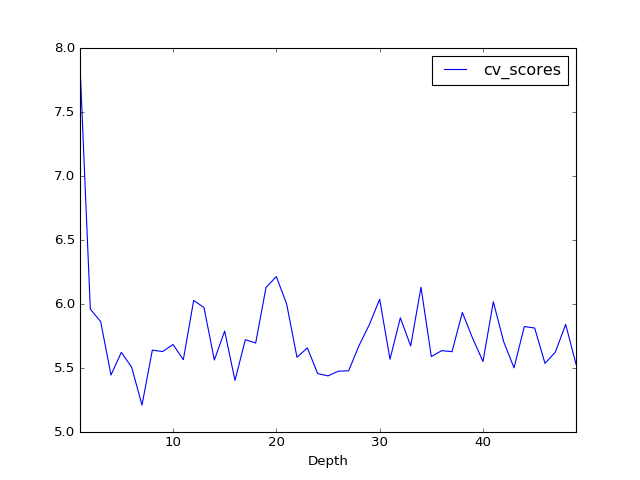

In [6]:
from sklearn.cross_validation import cross_val_score
Depth = range(1,50)
score = []
for i in Depth:
      treereg = DecisionTreeRegressor(max_depth=i)
      scores = cross_val_score(treereg, X, y, cv=10, scoring='mean_squared_error')
      score.append(np.mean(np.sqrt(-scores)))

Depth_Choice_df = pd.DataFrame({'cv_scores': score ,'Depth': Depth})
Depth_Choice_df.plot(x ='Depth',y = 'cv_scores' )

# we can see most of the imporvement is being captured by max_depth = 4. After that point 
# imporvement rate is less.  We can set max_depth to 4 or 6

Note that we did a -scores in the previous statement. This is because scikit reports mean square error as negative. Some debate/discussions on why the score is negative: https://github.com/scikit-learn/scikit-learn/issues/2439

In [12]:
treereg = DecisionTreeRegressor(max_depth=4)
treereg.fit(X,y)
ImportanceDataFrame = pd.DataFrame({'feature':X.columns.values, 'importance':treereg.feature_importances_})
ImportanceDataFrame.sort_values(by = ['importance'],ascending = 0)

# it sounds like rm, lstat, dis, crim, nox, black and ptratio have significant importance.

,feature,importance
5,rm,0.630160
12,lstat,0.193254
7,dis,0.075002
0,crim,0.044758
4,nox,0.041732
11,black,0.010327
10,ptratio,0.004132
6,age,0.000634
1,zn,0.000000
2,indus,0.000000


### Installing Graphviz (optional):
* Mac:
    * option: Type "conda install graphviz"in your command line
* Windows:
     [Download and install MSI file](http://www.graphviz.org/Download_windows.php)
     * Add it to your Path: Go to Control Panel, System, Advanced System Settings, Environment Variables. Under system 
       variables,edit "Path" to include the path to the "bin" folder, such as: C:\Program Files (x86)\Graphviz2.38\bin

In [ ]:
"""
# This is how we can create a graphical summary of decision trees. We can creat .dot files and 
# then need to either use a software that can open dot files or change dot file to png files
# in command line and then open it. 
# create a Graphviz file
from sklearn.tree import export_graphviz
with open("dt1.dot", 'wb') as f:
    f = export_graphviz(treereg, out_file=f, feature_names=X.columns.values)
"""

# Decision-Trees - Classification

In [19]:
BostonData['medvCategory'] = '1'
mask_cat2 = ((BostonData['medv'] > BostonData['medv'].quantile(.2)) & 
            (BostonData['medv'] <= BostonData['medv'].quantile(.5)))   
mask_cat3 = ((BostonData['medv'] > BostonData['medv'].quantile(.5)) & 
            (BostonData['medv'] <= BostonData['medv'].quantile(.8)))  
mask_cat4 = (BostonData['medv'] > BostonData['medv'].quantile(.8)) 

BostonData.loc[mask_cat2,'medvCategory'] = '2'
BostonData.loc[mask_cat3,'medvCategory'] = '3'
BostonData.loc[mask_cat4,'medvCategory'] = '4'

In [20]:
del BostonData['medv']
X = BostonData[BostonData.columns.values]
del X['medvCategory']
y = BostonData.medvCategory

In [21]:
from sklearn.tree import DecisionTreeClassifier
TreeClass = DecisionTreeClassifier(
                max_depth = 2,
                min_samples_leaf = 5)
TreeClass.fit(X,y) #Default uses Gini Index

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=5,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [23]:
scores = cross_val_score(TreeClass, X, y, cv=10) 
print(scores.mean())

0.558498630802


<IPython.core.display.Javascript object>


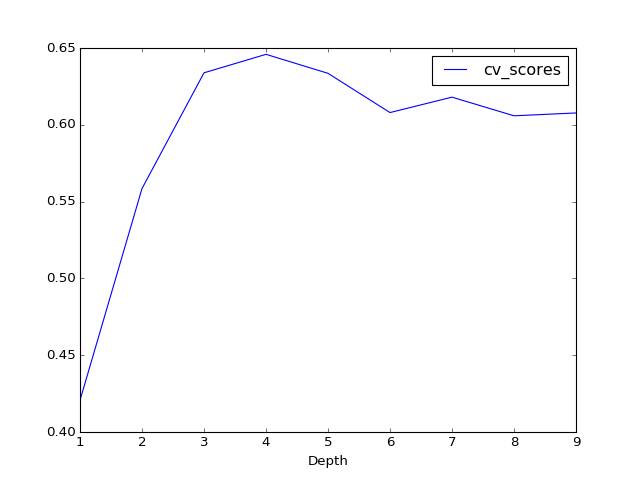

In [25]:
Depth = range(1,10)
score = []
for i in Depth:
      TreeClass = DecisionTreeClassifier(
                max_depth = i,
                min_samples_leaf = 5)
      scores = cross_val_score(TreeClass, X, y, cv=10)
      score.append(np.mean(scores))

Depth_Choice_df = pd.DataFrame({'cv_scores': score ,'Depth': Depth})
Depth_Choice_df.plot(x ='Depth',y = 'cv_scores' )

#It seems like at depth = 4 we achieved the best result

In [36]:
TreeClass = DecisionTreeClassifier(
                max_depth = 4,
                min_samples_leaf = 5)
TreeClass.fit(X,y)
ImportanceDataFrame = pd.DataFrame({'feature':X.columns.values, 'importance':TreeClass.feature_importances_})
ImportanceDataFrame.sort_values(by = ['importance'],ascending = 0)
BostonData["predicted_medvCat"] =  TreeClass.predict(X)
BostonData.head(20)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medvCategory,predicted_medvCat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,3,3
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,3,3
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,4,4
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,4,4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,4,4
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,4,3
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,3,2
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,3,2
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,2,2
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,2,2


In [37]:


from sklearn.tree import export_graphviz
from os import system 
model1 = DecisionTreeClassifier()
model1.fit(X, y) 
def build_tree_image(model):
    dotfile = open("tree.dot", 'w')
    export_graphviz(model,
                    out_file = dotfile,
                    feature_names = X.columns.values)
    dotfile.close()
    system("dot -Tpng tree.dot -o tree.png")

   
build_tree_image(model1)
